# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [4]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
import math
import matplotlib
from scipy import signal
from scipy import misc

from skimage.filters import threshold_otsu

Pretty printing has been turned ON


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [2]:

def dirac_fn(n=0, N=20):
    s = np.zeros((N, ))
    s[n] = 1
    return s


def box_fn (n=0, N=20): 
    H = np.zeros (N, )
    
    for a in np.arange (n,H.size):
        H[a]=1    
    
    return H

def conv_fn(signal,H) :
        
    x = np.zeros(signal.size + 2*H.size)
    for i in range(0, signal.size):
        x[i + H.size] = signal[i]

    Conv = np.zeros(x.size)
    for i in range(0, x.size):
        for j in range(0, h.size):
            Conv[i] += x[i-j] * H[j]
            
    return Conv



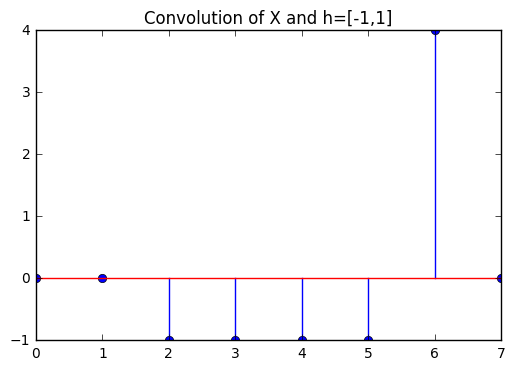

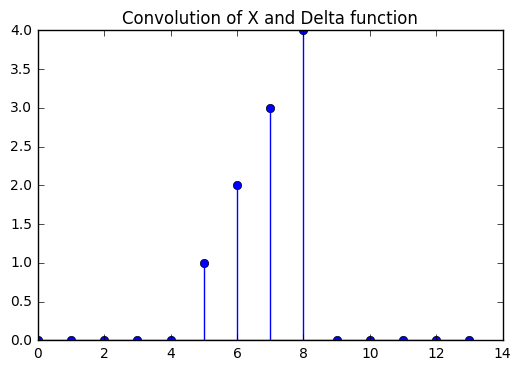

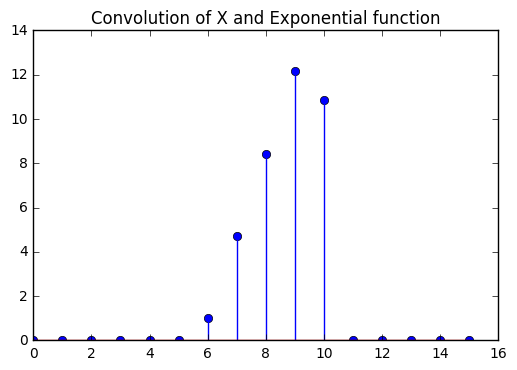

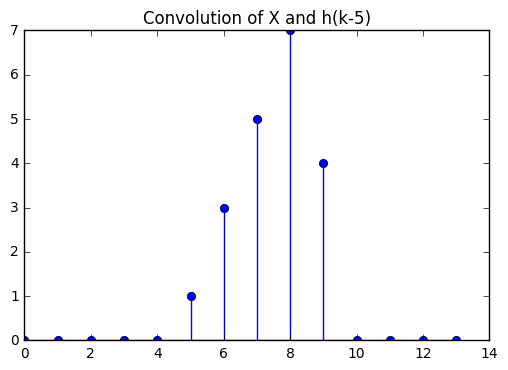

In [17]:

x = np.array([1, 2, 3, 4])
h = np.array([-1,1])
h2 = dirac_fn(0,5)

#FOR THE EXPONENTIAL SIGNAL:
h3 = np.zeros(6)
for i in range(0,h3.size):
    h3[i] = math.exp(i)

h4=box_fn(0,5)

conv1=conv_fn(x,h)
plt.figure()
plt.stem(conv1)
plt.title('Convolution of X and h=[-1,1]')
conv2=conv_fn(x,h2)
plt.figure()
plt.stem(conv2)
plt.title('Convolution of X and Delta function')
conv3=conv_fn(x,h3)
plt.figure()
plt.stem(conv3)
plt.title('Convolution of X and Exponential function')
conv4=conv_fn(x,h4)
plt.figure()
plt.stem(conv4)
plt.title('Convolution of X and h(k-5)')

## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [12]:
def conv2d(inn,m,n,K,coeffs):   
    out = np.zeros(shape=(m,n))

    for i in range(int(K/2), int(m - K/2)):
        for j in range(int(K/2) , int(n - K/2)):
            summ = 0; 
            for ii in range(int(-K/2), int(K/2)):
                for jj in range(int(-K/2), int(K/2)):
                    data = inn[i + ii][j +jj];
                    coeff = coeffs[ii + K/2][jj + K/2];
                    summ += data * coeff;
            out[i][j] = summ; 
    return out


C:\Users\elyamo\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\elyamo\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


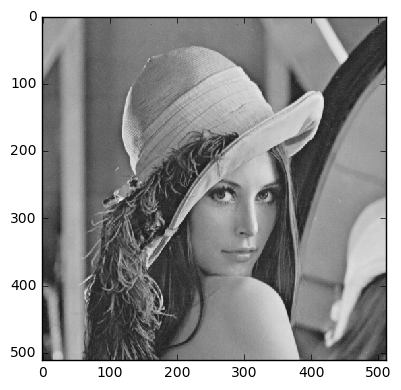

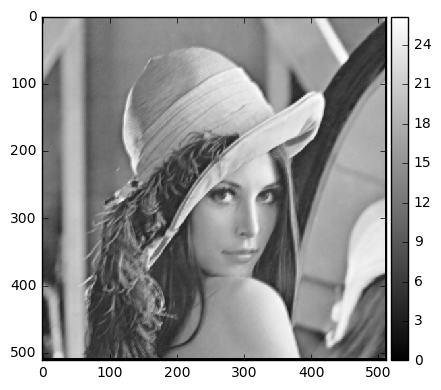

In [14]:
kernel = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4,1]])

for i in range(1,5):
    for j in range(1,5):
        kernel[i][j] = kernel[i][j]*1/256;

img_lena = io.imread("../images/lena-grey.bmp");

img_float = img_as_float(img_lena);
img_convolved = conv2d(img_float, 512, 512, 5,kernel);
io.imshow(img_lena)
plt.figure()
io.imshow(img_convolved,cmap=cm.gray);

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

ValueError: too many values to unpack (expected 1)

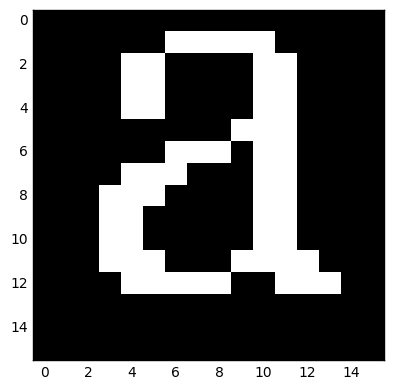

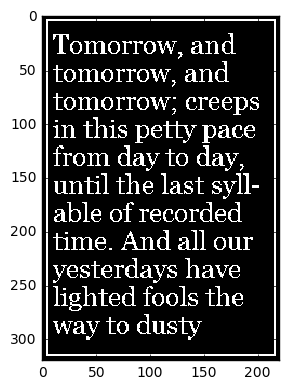

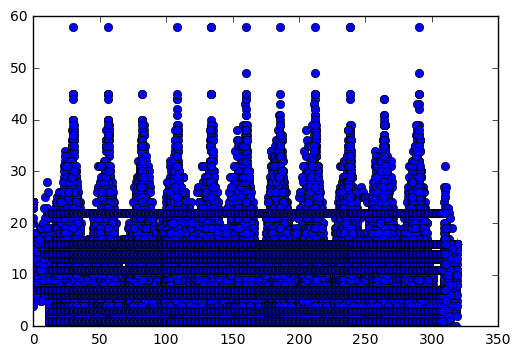

In [16]:

a_original = io.imread(("../images/a.png"),as_grey=True);
text = io.imread(("../images/text.png"),as_grey=True);
a_threshold = threshold_otsu(a_original)
binary1 = a_original <= a_threshold
binary1 = img_as_float(binary1)
text_threshold = threshold_otsu(text)
binary2 = text <= text_threshold
binary2 = img_as_float(binary2)
io.imshow(binary1);
plt.figure();
io.imshow(binary2);
the_correlation = signal.correlate2d(binary2,binary1,boundary='symm', mode='same')

plt.figure();
plt.stem(the_correlation);

